<a href="https://colab.research.google.com/github/masags17/Python/blob/main/CodigoHugo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
DBSCAN - Número de clusters: 2
Spectral Clustering - Adjusted Rand Index: -0.001
Spectral Clustering - Normalized Mutual Information: 0.009


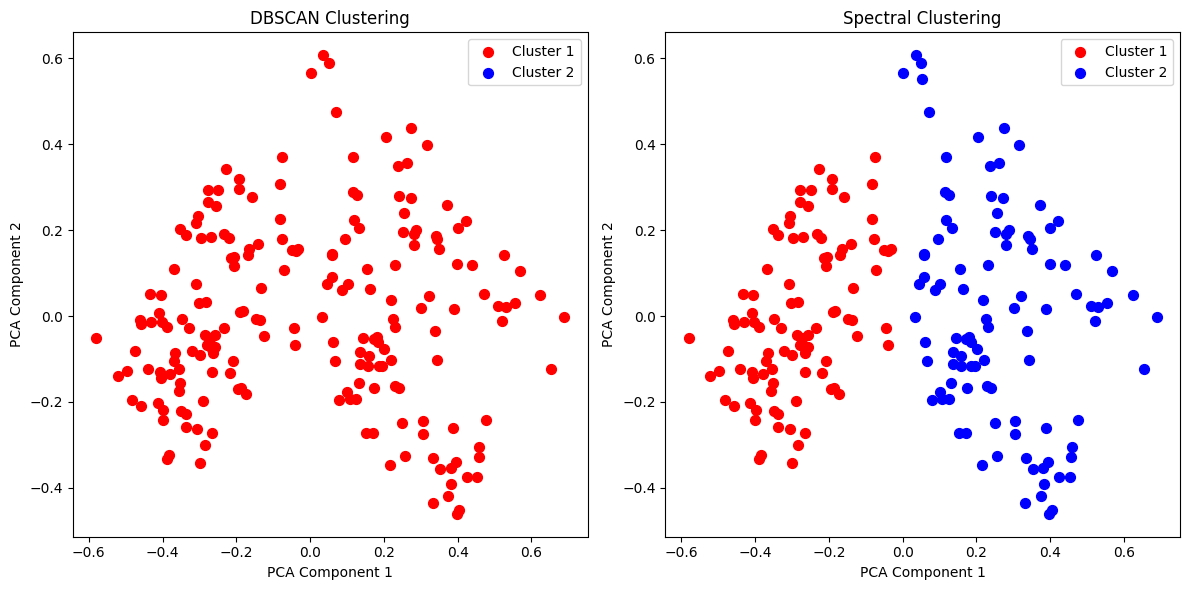

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Dataset/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA

# Cargar datos
data = pd.read_csv('Mall_Customers.csv')

# Preprocesamiento
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Clustering con DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X_scaled)
labels_dbscan = dbscan.labels_

# Evaluación DBSCAN
n_clusters_dbscan = len(np.unique(labels_dbscan))
print(f"DBSCAN - Número de clusters: {n_clusters_dbscan}")

# Clustering con Spectral Clustering
spectral = SpectralClustering(n_clusters=n_clusters_dbscan, random_state=42)
spectral.fit(X_scaled)
labels_spectral = spectral.labels_

# Evaluación Spectral Clustering
ari_spectral = adjusted_rand_score(labels_dbscan, labels_spectral)
nmi_spectral = normalized_mutual_info_score(labels_dbscan, labels_spectral)
print(f"Spectral Clustering - Adjusted Rand Index: {ari_spectral:.3f}")
print(f"Spectral Clustering - Normalized Mutual Information: {nmi_spectral:.3f}")

# Visualización de resultados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black']
for i, color in zip(range(n_clusters_dbscan), colors):
    mask = labels_dbscan == i
    ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], s=50, c=color, label=f'Cluster {i+1}')
ax1.set_title('DBSCAN Clustering')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.legend()

for i, color in zip(range(n_clusters_dbscan), colors):
    mask = labels_spectral == i
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], s=50, c=color, label=f'Cluster {i+1}')
ax2.set_title('Spectral Clustering')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.legend()

plt.tight_layout()
plt.show()